The purpose of this notebook is to provide some examples for how to use the visibility difference plotting tools `plot_diff_waterfall` and `plot_diff_uv`. These tools accept a pair of `UVData` objects&mdash;along with some extra parameters&mdash;and visualize the difference between the data (or a subset thereof) stored in the objects' `data_array` attributes. To briefly summarize: `plot_diff_waterfall` is intended to be used to investigate differences between two sets of visibilities for a single baseline and polarization, and may be used to investigate these differences in a variety of spaces (any combination of the following four sets of parameters: time and frequency; time and delay; fringe rate and frequency; fringe rate and delay); on the other hand, `plot_diff_uv` is intended to be used as a summarizing tool, as it visualizes the differences of the entire `data_array` in the $uv$-plane.

In [1]:
import hera_sim
import uvtools
import copy
%matplotlib inline

/home/bobby/anaconda3/envs/hera/lib/python3.7/site-packages/hera_sim/__init__.py:35: FutureWarning: 
In the next major release, all HERA-specific variables will be removed from the codebase. The following variables will need to be accessed through new class-like structures to be introduced in the next major release: 

noise.HERA_Tsky_mdl
noise.HERA_BEAM_POLY
sigchain.HERA_NRAO_BANDPASS
rfi.HERA_RFI_STATIONS

Additionally, the next major release will involve modifications to the package's API, which move toward a regularization of the way in which hera_sim methods are interfaced with; in particular, changes will be made such that the Simulator class is the most intuitive way of interfacing with the hera_sim package features.
  FutureWarning)


In [2]:
# make some antennas for generating a Simulator object
ants = hera_sim.antpos.hex_array(5)

# activate the H1C defaults for hera_sim
hera_sim.defaults.set('h1c')

# use a modest number of times and frequencies
sim = hera_sim.Simulator(n_freq=100, n_times=20, antennas=ants)

In [3]:
# add some foregrounds
sim.add_foregrounds("diffuse_foreground")

# make a copy of the Simulator object
sim2 = copy.deepcopy(sim)

# add EoR to one of the copies
sim.add_eor("noiselike_eor")

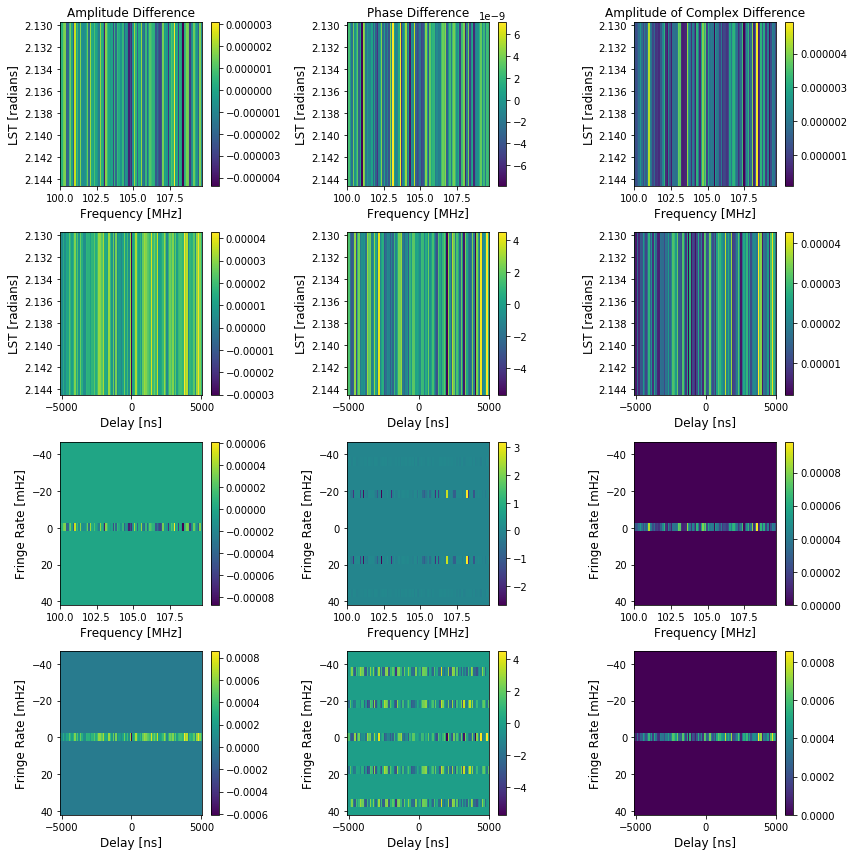

In [4]:
# let's look at the waterfall plots for the (0,1,'xx') baseline
antpairpol = (0,1,'xx')

# Simulator.data accesses the wrapped UVData object
uvtools.plot.plot_diff_waterfall(sim.data, sim2.data, antpairpol)

In [5]:
# if you want to check out the extra parameters you can list, uncomment the following line
#uvtools.plot.plot_diff_waterfall?

Note that in the above figure, four sets of plots were made; this is the default behavior of the `plot_diff_waterfall` function, but a subset of the plots may be chosen. A subset of the plots may be chosen by passing the kwarg `plot_type` a tuple or list of plot identifiers. The four identifiers are as follows: `"time_vs_freq"`, `"time_vs_dly"`, `"fr_vs_freq"`, `"fr_vs_dly"`. Also note that by default the `plot_diff_waterfall` runs a check on the `UVData` objects `uvd1` and `uvd2` passed as the first and second required arguments; this ensures that the simulated times, frequencies, and baselines all agree, but the check may be skipped by passing `skip_check=True` to the function call. Finally, the resulting figure may be saved by passing a string or tuple/list of strings to the function call using the kwarg `save_path`.

invalid value encountered in less_equal


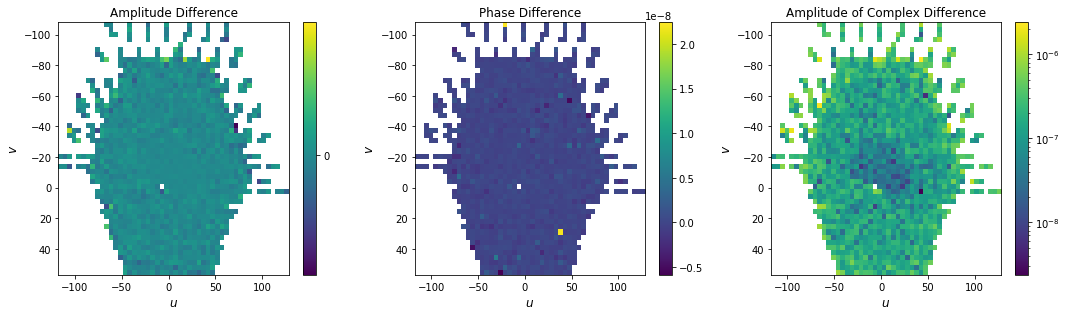

In [6]:
# now let's look at the summary of the differences
# this one takes a while...
uvtools.plot.plot_diff_uv(sim.data, sim2.data)

In [7]:
# again, if you want to check out the extra parameters...
#uvtools.plot.plot_diff_uv?

In [8]:
# something a little more interesting
sim = copy.deepcopy(sim2)
sim.add_gains()

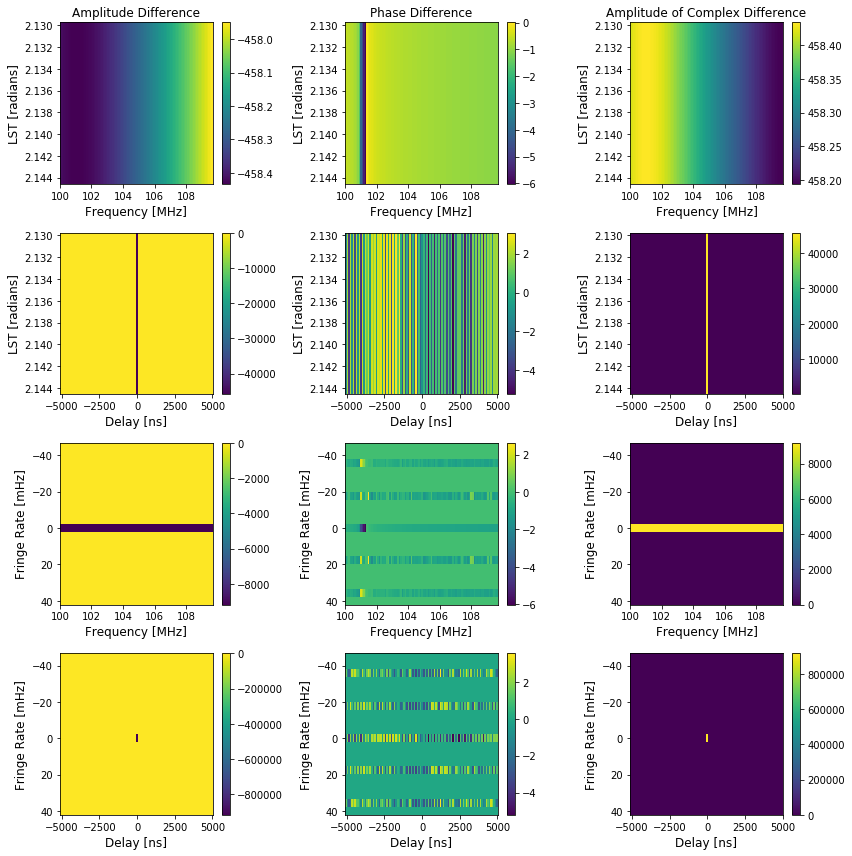

In [9]:
uvtools.plot.plot_diff_waterfall(sim.data, sim2.data, antpairpol)

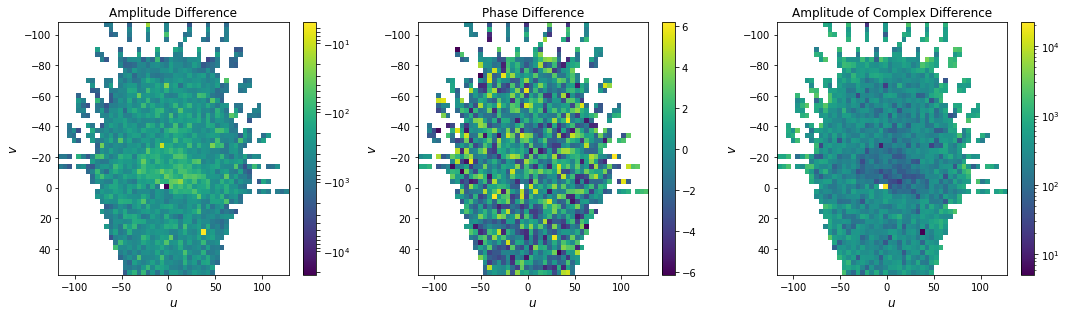

In [10]:
uvtools.plot.plot_diff_uv(sim.data, sim2.data)

In [11]:
# what about if we add crosstalk?
sim = copy.deepcopy(sim2)
sim.add_xtalk("gen_whitenoise_xtalk")

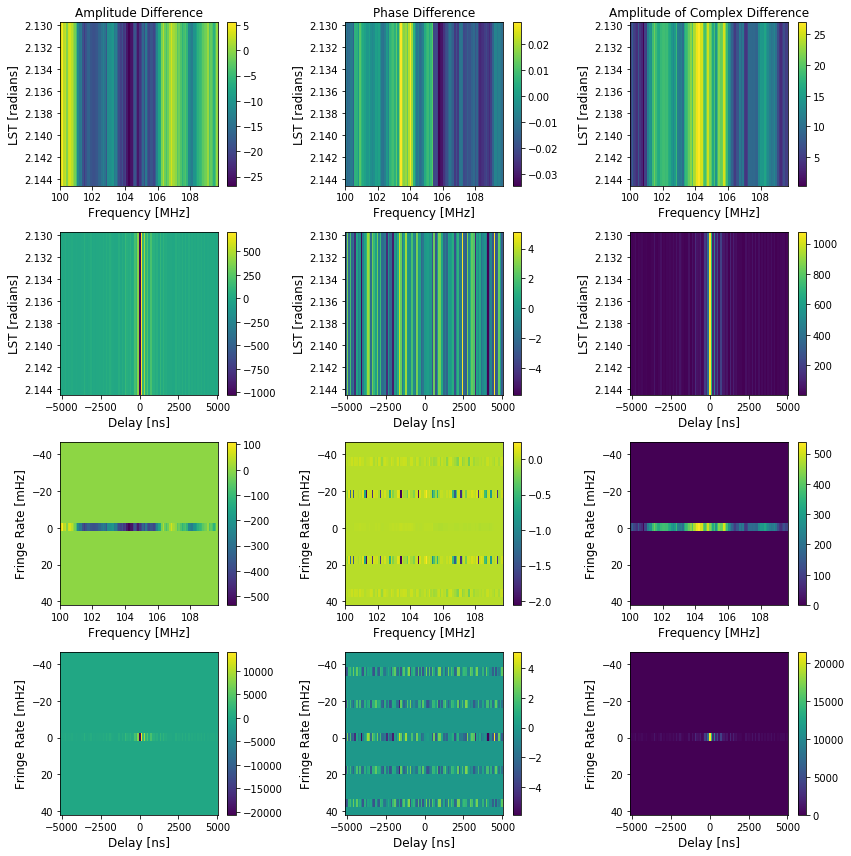

In [12]:
uvtools.plot.plot_diff_waterfall(sim.data, sim2.data, antpairpol)

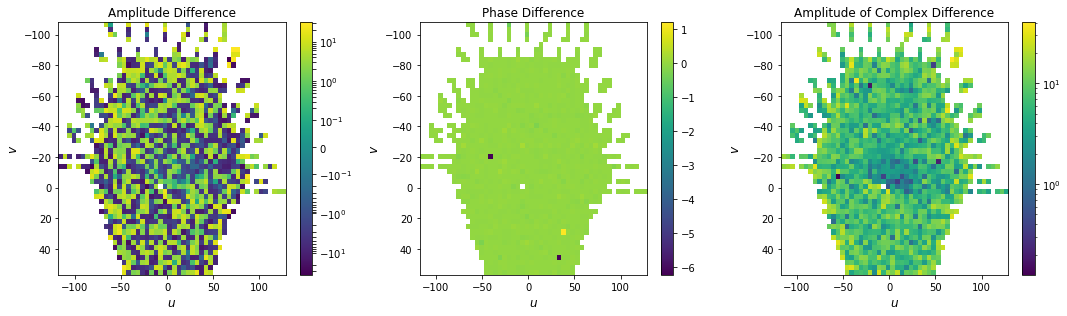

In [13]:
uvtools.plot.plot_diff_uv(sim.data, sim2.data)